On a fixed algorithm, on a fixed problem, try different learning rates


In [ ]:
from scipy.optimize import minimize, rosen, rosen_der

In [ ]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,

               options={'gtol': 1e-6, 'disp': True, 'maxiter': 1},
               )
res

In [ ]:
def optimizer_trajectory(x0, num_iter=100):
    xt = x0
    X=[x0]
    for _ in range(num_iter):
        res = minimize(rosen, xt, method='BFGS', jac=rosen_der,

               options={'gtol': 1e-6, 
                        'disp': False, # verbose 
                        'maxiter': 1})
        xt = res.x
        X.append(xt)
    return X



In [ ]:
x0 = [1.3, 0.7]
optimizer_trajectory(x0)

In [ ]:
import numpy as np

hard to get intermediate values using implementation for this repo https://github.com/stewy33/Learning-to-Optimize

In [ ]:
from lr_utils import run_optimizer, convex_quadratic, rosenbrock
import torch
from torch import nn

In [ ]:
problem = rosenbrock()
problem['model0'].x

In [ ]:
run = run_optimizer(torch.optim.SGD, problem, 100, {"lr": 5e-2})
run[0]

In [ ]:
run[0]
import matplotlib.pyplot as plt
plt.plot(run[0])


In [ ]:
def optimizer_performance(optimizer, problem, num_runs, num_iter, hyperparams):
    """Run an optimizer on a problem for a number of runs and epochs."""
    losses = []
    for _ in range(num_runs):
        optimizer_= optimizer
        problem_ = problem
        run = run_optimizer(optimizer_, problem_, num_iter, hyperparams)
        losses.append(np.absolute(run[0]))
    return losses

In [ ]:
lr_list = np.logspace(-0.5, -4, 20)
#lr_list = np.linspace(0.5, 0.01, 10)
losses_quad = [optimizer_performance(torch.optim.Adam, problem, 10, 100, {"lr": lr}) for lr in lr_list]

In [ ]:
#plot sum of losses
plt.scatter(lr_list, [np.mean(loss, axis=0)[-1] for loss in losses_quad])


In [ ]:
plt.plot([np.mean(loss, axis=1) for loss in losses_quad])
plt.plot([np.mean(loss, axis=0)[-1] for loss in losses_quad])

In [ ]:
min_lr = np.argmin([np.mean(loss, axis=0)[-1]for loss in losses_quad])
print(min_lr)
print(lr_list[min_lr])

In [ ]:
len(losses[0])

In [ ]:
losses[0]

In [64]:
from lr_utils import minimize_custom, minimize_custom_, norm_function, rosen_function
import torch
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x_dim = 1 # dimension of the problem
objective_function = norm_function
x_0 = 0.0#torch.tensor([0.0], requires_grad=True)
optimizer_class = torch.optim.SGD #torch.optim.Adam,
precision = 1e-6

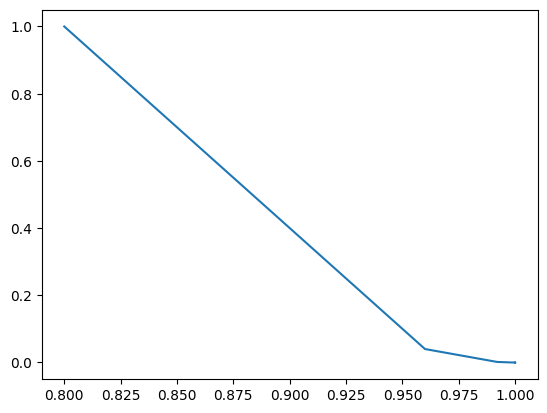

In [68]:
X,F = minimize_custom(objective=objective_function,
                optimizer_class=optimizer_class,
                x_0=x_0,#0.,#[1.3, 0.7, 0.8, 1.9, 1.2],
                lr=4e-1,
                steps=100,)

plt.plot(X,F)

In [69]:
lrs = np.logspace(0, -5, 20)
nb_runs = 50
#numpy array of size ( nb_lrs, nb_runs, nb_steps)
losses = np.zeros((len(lrs), nb_runs, 100))
for i, lr in enumerate(lrs):
    for j in range(nb_runs):
        X, F = minimize_custom(objective=objective_function,
                optimizer_class=optimizer_class,

                x_0=np.random.randn(x_dim),
                #x_0=[1.3, 0.7, 0.8, 1.9, 1.2],
                lr=lr,
                steps=100,)

        losses[i, j] = F 


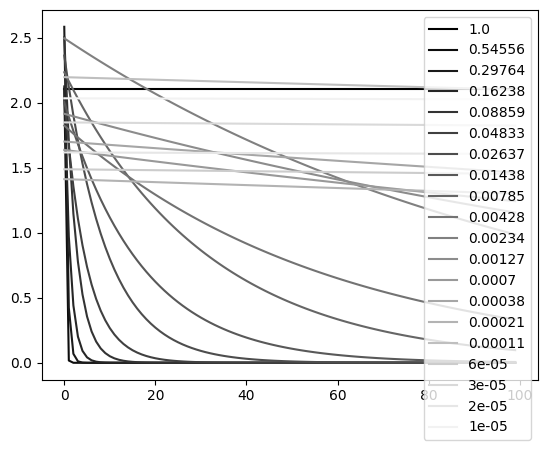

In [70]:
import matplotlib as mpl
#plot mean trajectory per lr
np.mean(losses, axis=1).shape
#plt.plot( np.mean(losses, axis=1)[0])
for i in range(len(lrs)):
    plt.plot(np.mean(losses, axis=1)[i],color=str(i/len(lrs)))
plt.legend([str(round(lr,5)) for lr in lrs])
plt.show()



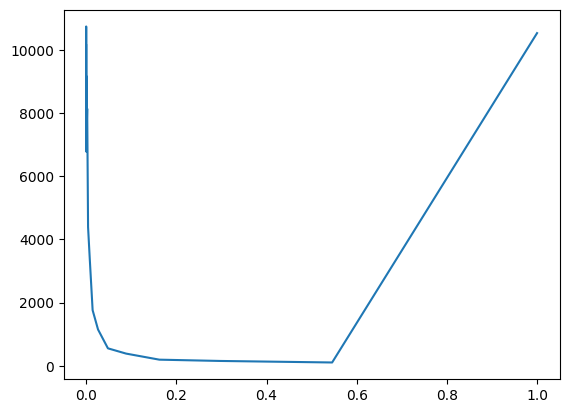

In [71]:
plt.plot(lrs,np.sum(losses, axis=(1,2)))


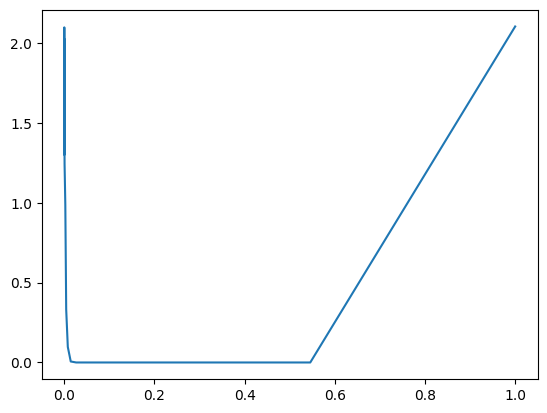

In [72]:
plt.plot(lrs,np.mean(losses[:,:,-1], axis=(1)))

In [73]:
np.sum(losses, axis=(1,2)).shape

(20,)

In [74]:
losses.shape

(20, 50, 100)

In [75]:
def first_index_below_threshold(array, threshold):
    """Return the first index of an array below a threshold. if none, return last index."""
    for i, x in enumerate(array):
        if x < threshold:
            return i
    return len(array)-1



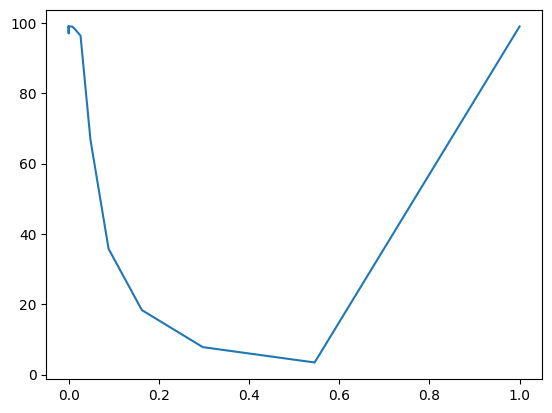

In [76]:
plt.plot(lrs,
        np.mean(
            np.apply_along_axis(first_index_below_threshold, 2, losses, precision)
            , axis=1)
        )
        

In [77]:
losses[0][0]<precision

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])